In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('DigitalAd_dataset.csv')


In [3]:
print(dataset.shape)
print(dataset.head(5))

(400, 3)
   Age  Salary  Status
0   18   82000       0
1   29   80000       0
2   47   25000       1
3   45   26000       1
4   46   28000       1


In [4]:
'''Seggreagate Dataset into x(Indep/ip) & y(OP/DEP var)'''
x=dataset.iloc[:,:-1].values
x

array([[    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],
       [    27,  17000],
       [    33,  51000],
       [    35, 108000],
       [    30,  15000],
       [    28,  84000],
       [    23,  20000],
       [    25,  79000],
       [    27,  54000],
       [    30, 135000],
       [    31,  89000],
       [    24,  32000],
       [    18,  44000],
       [    29,  83000],
       [    35,  23000],


In [6]:
y=dataset.iloc[:,-1].values
y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [7]:
'''TRAIN_TEST_SPLIT'''
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [8]:
'''feature scaling'''
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

Text(0, 0.5, 'Mean Error')

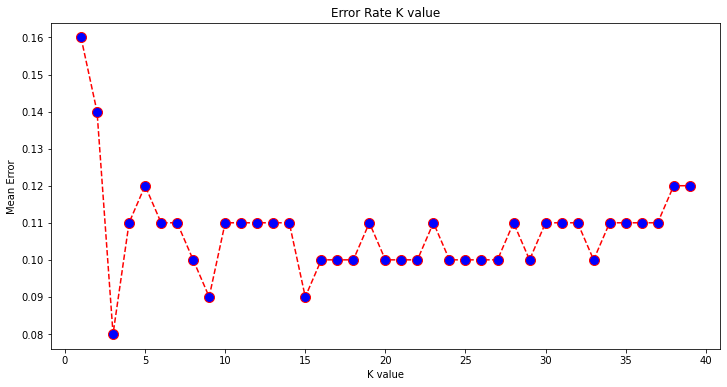

In [9]:
'''FINDING BEST VALUE OF K'''
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#calculating error for K values bw 1 and 40

for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i !=y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean Error')


In [10]:
'''TRAINING'''
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)  #p=2 refers to euclidean distance
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [11]:
'''PREDICTING IF THE CUSTOMER WILL BUY OR NOT'''
age=int(input("Enter new Customer's age: "))
salary=int(input("Enter new Customer's salary: "))
newEmp=[[age,salary]]
result=model.predict(sc.transform(newEmp))
print(result)

if result ==1:
    print("The customer will buy")
else:
    print("The customer won't buy")
    
    


Enter new Customer's age: 47
Enter new Customer's salary: 25000
[1]
The customer will buy


In [12]:
'''FOR ALL TEST DATA'''
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [13]:
'''Validation--confusion matrix'''
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)

print("Confusion matrix: ")
print(cm)

print("Accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusion matrix: 
[[57  4]
 [ 4 35]]
Accuracy of the model: 92.0%
